# Customer Personality Analysis By using K-Means Clustering Method

## Importing the libraries

In [229]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

## Importing the dataset

In [230]:
dataset=pd.read_csv('marketing_campaign.csv', sep="\t")
dataset.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [231]:
#X=dataset.iloc[:,[4,10]].values

In [232]:
#print(X)

In [233]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [234]:
dataset.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [235]:
dataset.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

## Finding null values

In [236]:
dataset.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [237]:
print("Income mean: ", dataset.Income.mean())
print("Income median: ", dataset.Income.median())

Income mean:  52247.25135379061
Income median:  51381.5


In [238]:
# Replacing the average income with missing values
dataset = dataset.fillna(dataset.Income.mean())

In [239]:
dataset.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

### Dataset Columns Types:

In [240]:
dataset.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [241]:
# categorical columns
categorical =  dataset.select_dtypes(include=['object']).columns
categorical = list(categorical)
categorical

['Education', 'Marital_Status', 'Dt_Customer']

In [242]:
# Numerical columns
numerical =  dataset.select_dtypes(exclude=['object']).columns
numerical = list(numerical)
numerical

['ID',
 'Year_Birth',
 'Income',
 'Kidhome',
 'Teenhome',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Z_CostContact',
 'Z_Revenue',
 'Response']

In [243]:
# Unique categorical values
for i in dataset[categorical]:
    print(i , dataset[categorical][i].nunique())

Education 5
Marital_Status 8
Dt_Customer 663


In [244]:
# Counting the number of different educational level
dataset.Education.value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

### I consider to regroup PHD, Master and Graduation in one group and 2n cycle and basic in another group!

In [245]:
dataset.Education = dataset.Education.replace(['PhD','Graduation', 'Master'], 'fully_Graduated')

dataset.Education = dataset.Education.replace(['Basic', '2n Cycle'], 'under_Graduated')

In [246]:
Education = dataset.Education.value_counts()
Education

fully_Graduated    1983
under_Graduated     257
Name: Education, dtype: int64

In [247]:
dataset.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,fully_Graduated,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,fully_Graduated,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,fully_Graduated,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,fully_Graduated,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,fully_Graduated,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


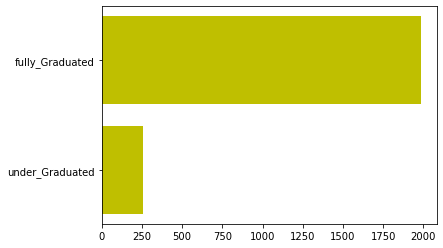

In [248]:
# Plotting the educaiton levels
fig , ax = plt.subplots()
ax.barh(Education.keys(), Education.values,color='y')
ax.invert_yaxis()
plt.show()

In [249]:
# Counting the number of different marital status
dataset.Marital_Status.value_counts()


Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64

### Here I want to regroup married and together in one group and the rest in another group

In [250]:
dataset.Marital_Status = dataset.Marital_Status.replace(['Married','Together'], 'Partner')

dataset.Marital_Status = dataset.Marital_Status.replace(['Single','Divorced', 'Widow', 'Alone','Absurd', 'YOLO'], 'Single')

In [251]:
m_status = dataset.Marital_Status.value_counts()
m_status

Partner    1444
Single      796
Name: Marital_Status, dtype: int64

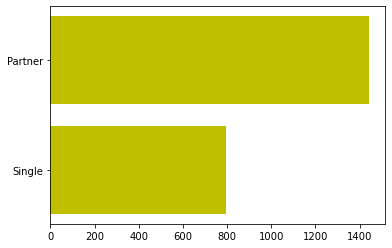

In [252]:
# Plotting the educaiton levels
fig , ax = plt.subplots()
ax.barh(m_status.keys(), m_status.values,color='y')
ax.invert_yaxis()


In [253]:
dataset.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,fully_Graduated,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,fully_Graduated,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,fully_Graduated,Partner,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,fully_Graduated,Partner,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,fully_Graduated,Partner,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


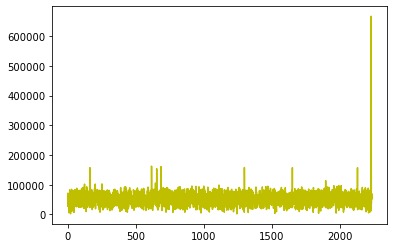

In [254]:
plt.plot(dataset['Income'],color='y')

In [255]:
# I considered the incomes more than 200000 as outliers
dataset = dataset[dataset['Income']< 200000]
dataset.shape

(2239, 29)

## Encoding Categorical Data

In [256]:
Education=pd.get_dummies(dataset['Education'],drop_first=True)
Education.head()

,under_Graduated
0,0
1,0
2,0
3,0
4,0


In [257]:
Marital_Status=pd.get_dummies(dataset['Marital_Status'],drop_first=True)
Marital_Status.head()

,Single
0,1
1,1
2,0
3,0
4,0


In [258]:
dataset= pd.concat([dataset,Marital_Status,Education],axis=1)

In [259]:
dataset.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Single,under_Graduated
0,5524,1957,fully_Graduated,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,3,11,1,1,0
1,2174,1954,fully_Graduated,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,3,11,0,1,0
2,4141,1965,fully_Graduated,Partner,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,3,11,0,0,0
3,6182,1984,fully_Graduated,Partner,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,3,11,0,0,0
4,5324,1981,fully_Graduated,Partner,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,3,11,0,0,0


In [260]:
dataset.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Single', 'under_Graduated'],
      dtype='object')

In [261]:
dataset.drop(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Dt_Customer', 'Recency','NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],axis=1,inplace=True)

In [262]:
dataset.head()

,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Single,under_Graduated
0,58138.0,0,0,635,88,546,172,88,88,1,0
1,46344.0,1,1,11,1,6,2,1,6,1,0
2,71613.0,0,0,426,49,127,111,21,42,0,0
3,26646.0,1,0,11,4,20,10,3,5,0,0
4,58293.0,1,0,173,43,118,46,27,15,0,0


In [271]:
X=dataset.iloc[:,[0,4,5]].values
print(X)

[[5.8138e+04 8.8000e+01 5.4600e+02]
 [4.6344e+04 1.0000e+00 6.0000e+00]
 [7.1613e+04 4.9000e+01 1.2700e+02]
 ...
 [5.6981e+04 4.8000e+01 2.1700e+02]
 [6.9245e+04 3.0000e+01 2.1400e+02]
 [5.2869e+04 3.0000e+00 6.1000e+01]]


## Clustering with K-means

## Using the elbow method to find the optimal number of clusters

In [264]:
from sklearn.cluster import KMeans
# Within cluster sum of squares
wcss=[]
for i in range(1,11):
    # To avoid of K-Means Random Initialization Trap K_meas++ is used
    kmean= KMeans(n_clusters=i, init='k-means++',random_state=42 )
    kmean.fit(X)
    wcss.append(kmean.inertia_)

## Visialised the Elbow method

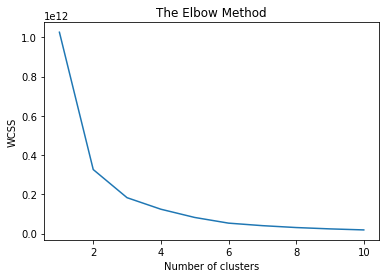

In [265]:
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Training the K-Means model on the dataset

In [272]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_Prediction = kmeans.fit_predict(X)
y_Prediction

array([1, 2, 1, ..., 1, 1, 2])

## Visualising the clusters

In [273]:
dataset["Income"].shape

(2239,)

In [274]:
dataset["Single"].shape

(2239,)

In [275]:
dataset["under_Graduated"].shape

(2239,)

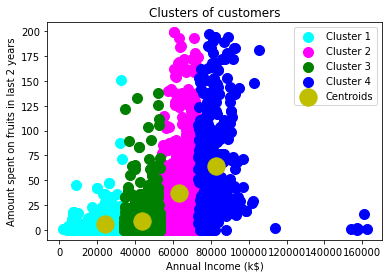

In [281]:

plt.scatter(X[y_Prediction == 0, 0], X[y_Prediction == 0, 1], s = 100, c = 'cyan', label = 'Cluster 1',cmap='viridis')
plt.scatter(X[y_Prediction == 1, 0], X[y_Prediction == 1, 1], s = 100, c = 'magenta', label = 'Cluster 2',cmap='viridis')
plt.scatter(X[y_Prediction == 2, 0], X[y_Prediction == 2, 1], s = 100, c = 'green', label = 'Cluster 3',cmap='viridis')
plt.scatter(X[y_Prediction == 3, 0], X[y_Prediction == 3, 1], s = 100, c = 'blue', label = 'Cluster 4',cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, color = 'y', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Amount spent on fruits in last 2 years')
plt.legend()
plt.show()